# 국제 결혼에 대한 인식(feat. 유튜브)

## 국제 결혼 커플 (유튜버)
- 일본 - YUKA-CHANNEL : https://www.youtube.com/watch?v=ajLYvGEdDY0
- 중국 - 왕홍부부_WangHong : https://www.youtube.com/watch?v=tQlBLSVxND0
- 베트남 - 국제커플링링 LingLing Couple : https://www.youtube.com/watch?v=YguIk_j-Bn0

## 국제 결혼 인식
결혼 인식 : https://gall.dcinside.com/board/lists/?id=wedding

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [19]:
# 드라이버 옵션 설정

chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option("detach", True) # 브라우저 열어놓을지 선택

# 크롬 매니저 설치
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install(),
                          options=chrome_options))

# 3.웹드라이버 주소 넣기

time.sleep(2) # 로딩 기다리는 시간


In [20]:
comments_list = []
def yt_scroll(url, num):
    driver.get(url) # 사이트 이동
    time.sleep(2)

    driver.find_element(By.CLASS_NAME, 'ytp-play-button').click() # 재생/정지버튼 클릭
    comments = driver.find_elements(By.CLASS_NAME, 'yt-core-attributed-string') # 댓글 받아오기

    while True:
        if len(comments) >= num:
            break
        driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END) # 최하위로 스크롤
        comments = driver.find_elements(By.CLASS_NAME, 'yt-core-attributed-string--white-space-pre-wrap') # 댓글 받아오기
    for i in comments:
        comments_list.append(i.text)

In [21]:
urls = [
    'https://www.youtube.com/watch?v=YguIk_j-Bn0', # 베트남
    'https://www.youtube.com/watch?v=tQlBLSVxND0', # 왕홍
    'https://www.youtube.com/watch?v=ajLYvGEdDY0', # 일본
]

yt_scroll('https://www.youtube.com/watch?v=zEONjOh_R54', 1000)

len(comments_list)

1008

In [22]:
comments_list

['',
 '장난이라도 사랑을 떠보지마세요. 여친은 애써 표정관리하는게 맘아파요. 국제커플인만큼 더큰 신뢰와 믿음을 주시고 사랑해주세요. 응원할께요',
 '10살 연하에 미인 여자친구 ㄷㄷ 오히려 남자친구분이 걱정돼서 다른 곳 못 가겠는데요ㅎㅎ 부럽습니다~',
 '와... 진짜 이쁘고 착하고 행복하세요 잘보고 가요ㅎ',
 '너무 이쁘셔서.. 장난이라도 그러지 마세요~\n여친님..애써 울음을 참는 표정이에요~',
 '당신이 애국자입니다.\n정말 아름답고 말도 이쁘게 하고 멋지다',
 '안기다린다 다른남자만난다 하는거보니 몇년도 기다릴듯 ㅋㅋㅋ\n부럽네요. ㅋㅋㅋㅋㅋ',
 '우왕.. 여자친구분 얼굴도 목소리도 마음씨도 다 예쁘시네요.. ',
 '링링님 마음이 천사 이시네요 너무 착하셔 ㅠㅠ  눈물 참으려는 것도 보이고 장난이라도 그런 말은 가급적 하시지 마세요 표정에서 참으려고 하는 게 다 보여요.. 오래 오래 행복하셔요 정말 링링양은 천사에요',
 '우와~ 여친님이 참 예쁘고 귀엽네요. 밥만 먹여주면 따라간다고 ㅠㅠ 부럽습니다. 좋으시겠어요 ㅎㅎ',
 '여친 분 한국말 잘하시네요ㄷㄷ',
 '절대 헤어지지마세요 그리고 연인을 멀리 두지마세요 한국으로 데리고 오세요 \n한국친구들 만들어주세요 \n평생 함께 사세요 힘내세요',
 '와... 힐링하면서 봤네요. 어디까지든 같이 따라갈수있다니 ...\n행복하겠다 진짜..',
 '보면 볼수록 여자분이 예쁘고 참하네요 무조건 예쁜 사람 하세요',
 '우아!!여친분이 한국어 유창하시고ㅎㅎ너무 이쁘세요두분 예쁜 사랑하세용!!',
 '남여의 사랑에는 국경이 없네요.\n정말 부러운 커플입니다 ^^',
 '10살이 어린게 중요한게 아니라 여자친구분이 이뻐서 복받으셨네',
 '와 여자분 넘 미인이시다',
 '마음마저 예쁩니다.\n예쁜 사랑 하시길 바랍니다',
 '이쁜아가씨  부러움의대상이네요\n한국남자  맘설레이고\n잠못들게하네요..^^',
 '순수함이 물씬~ 서툰 한국말이 너무 이뻐요~',
 '진짜 부럽다 여성분이 매력이 넘치네 한국

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from konlpy.tag import Okt
from konlpy.tag import Mecab 
import re # 특수 문자 등 필요 없는 문자 제거를 위한 라이브러리

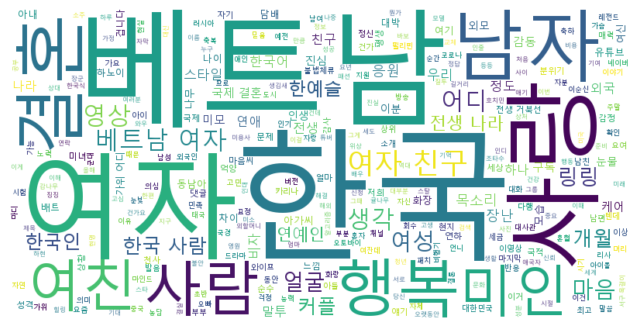

In [24]:
okt = Okt()
con = "".join(comments_list) # 문자열로 변경
con = re.sub(r'[^가-힣\s]', '', con) # 한국어를 제외한 문자 제거

mecab= Mecab(dicpath='C:\mecab\mecab-ko-dic') # 명사 추출 객체
con_nouns = mecab.nouns(con)
con_nouns

# mecab 처리 텍스트
stopwords = ['저', '때', '당시', '지금', '처녀', '자지', '난자', '정자', '섹스', '프리 섹스', '토모', '미호']

# 불용어 제거
con_nouns = [word for word in con_nouns if word not in stopwords]
con_nouns

result = []
for i in con_nouns:
    if len(i) > 1:
        result.append(i)
result = " ".join(result)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    background_color='white',  # 배경색
    max_words=300,  # 최대 단어 수
    width=800, height=400  # 크기
).generate(result)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [115]:
cmt_res=[]
for i in comments:
    cmt_res.append(i.text)

cmt_res

AttributeError: 'list' object has no attribute 'text'